In [ ]:
import pandas as pd
df = pd.read_csv('weather_borrow.csv')

In [ ]:
# 整理天氣變數
df['Sunny'] = df[['Weather_Clear', 'Weather_Sunny', 'Weather_Partly sunny', 'Weather_Passing clouds', 'Weather_Scattered clouds']].max(axis=1)
df['Cloudy'] = df[['Weather_Cloudy', 'Weather_Overcast', 'Weather_Low clouds', 'Weather_Partly cloudy', 'Weather_More clouds than sun', 'Weather_Mostly cloudy', 'Weather_Broken clouds']].max(axis=1)
df['Rainy'] = df[['Weather_Light rain', 'Weather_Rain']].max(axis=1)
df['Foggy'] = df[['Weather_Fog']].max(axis=1)
df = df.drop(['Weather_Broken clouds', 'Weather_Clear', 'Weather_Cloudy', 'Weather_Fog', 'Weather_Light rain',
       'Weather_More clouds than sun', 'Weather_Mostly cloudy', 'Weather_Overcast', 'Weather_Partly cloudy', 'Weather_Partly sunny',
       'Weather_Passing clouds', 'Weather_Rain', 'Weather_Scattered clouds', 'Weather_Sunny', 'Weather_Low clouds'], axis=1)
df

,Unnamed: 0,rideable_type_classic_bike,rideable_type_docked_bike,rideable_type_electric_bike,day_of_month,hour,average_vol,member_casual,Temp,Wind,Humidity,Barometer,Visibility,Sunny,Cloudy,Rainy,Foggy
0,0,1,0,0,29,17,440.1250,0,25,NaN,0.35,1017,16,1,0,0,0
1,1,1,0,0,6,13,354.1875,0,21,6.0,0.33,1023,16,1,0,0,0
2,2,1,0,0,7,17,371.4375,1,23,0.0,0.37,1011,16,1,0,0,0
3,3,1,0,0,18,17,733.1250,1,14,NaN,0.49,1027,16,1,0,0,0
4,4,1,0,0,30,16,761.5000,0,21,7.0,0.44,1022,16,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196172,2196172,0,0,1,26,18,287.6875,1,22,9.0,0.26,1024,16,1,0,0,0
2196173,2196173,0,0,1,26,16,300.6875,1,22,0.0,0.28,1024,16,1,0,0,0
2196174,2196174,1,0,0,1,19,199.3125,1,15,NaN,0.42,995,16,0,1,0,0
2196175,2196175,1,0,0,10,8,208.1875,1,13,0.0,0.62,1022,16,1,0,0,0


In [ ]:
# 計算每小時的借用數量並統整欄位
agg_funcs = {
    'Sunny': lambda x: x.mode().iloc[0],
    'Cloudy': lambda x: x.mode().iloc[0],
    'Rainy': lambda x: x.mode().iloc[0],
    'Foggy': lambda x: x.mode().iloc[0],
    'average_vol': 'mean',
    'member_casual': lambda x: (x == 1).sum() / ((x == 0).sum()+(x == 1).sum())*100,
    'rideable_type_classic_bike': lambda x: (x == 1).sum() / (x == 0).sum(),
    'Temp': lambda x: x.mode().iloc[0],
    'Wind': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    'Humidity': lambda x: x.mode().iloc[0]*100,
    'Barometer': lambda x: x.mode().iloc[0],
    'Visibility': lambda x: x.mode().iloc[0]}
hourly_counts = df.groupby(['day_of_month', 'hour']).agg(agg_funcs).reset_index()
hourly_counts['count'] = df.groupby(['day_of_month', 'hour']).size().reset_index(name='count')['count']
hourly_counts['Wind'] = hourly_counts['Wind'].fillna((hourly_counts['Wind'].shift() + hourly_counts['Wind'].shift(-1))/2)
hourly_counts['Wind'] = hourly_counts['Wind'].fillna(0)
hourly_counts

,day_of_month,hour,Sunny,Cloudy,Rainy,Foggy,average_vol,member_casual,rideable_type_classic_bike,Temp,Wind,Humidity,Barometer,Visibility,count
0,1,0,0,0,0,1,82.667039,83.730159,5.300000,16,0.0,93.0,983,5,252
1,1,1,0,0,0,1,44.838068,83.636364,6.857143,15,0.0,96.0,983,3,110
2,1,2,0,1,1,0,31.964926,87.341772,12.166667,13,11.0,96.0,984,16,79
3,1,3,0,1,0,0,32.066208,86.440678,5.555556,10,9.0,86.0,986,16,59
4,1,4,0,1,0,0,56.916118,84.210526,8.500000,10,17.0,80.0,987,16,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,31,19,1,0,0,0,397.171186,83.521524,20.070632,21,7.0,55.0,1021,14,5668
740,31,20,1,0,0,0,332.276172,83.736426,19.361809,21,7.0,55.0,1021,14,4052
741,31,21,1,0,0,0,284.540633,84.073014,13.255102,18,0.0,68.0,1021,16,2794
742,31,22,1,0,0,0,258.486083,82.807188,12.546053,17,0.0,73.0,1021,16,2059


In [ ]:
# 相關性檢驗(VIF)，並刪除可能會產生共線性的連續變數
from statsmodels.stats.outliers_influence import variance_inflation_factor
continuous_columns = ['average_vol','Temp','Wind','Humidity']
X_continuous = hourly_counts[continuous_columns]
vif_continuous = pd.DataFrame()
vif_continuous["Variable"] = X_continuous.columns
vif_continuous["VIF"] = [variance_inflation_factor(X_continuous.values, i) for i in range(X_continuous.shape[1])]
hourly_counts = hourly_counts.drop('Barometer', axis=1)
hourly_counts = hourly_counts.drop('Visibility', axis=1)
vif_continuous

,Variable,VIF
0,average_vol,5.289619
1,Temp,6.512581
2,Wind,2.489792
3,Humidity,3.452260


In [ ]:
# 借用次數對天氣、車流量的線性回歸分析
import statsmodels.api as sm
x = hourly_counts[['average_vol','Sunny', 'Cloudy', 'Rainy', 'Foggy', 'Temp', 'Wind', 'Humidity']]
y = hourly_counts['count']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model.summary()
# 車流量、雨天、溫度顯著

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     246.6
Date:                Sun, 24 Dec 2023   Prob (F-statistic):          2.44e-202
Time:                        11:58:54   Log-Likelihood:                -6295.5
No. Observations:                 744   AIC:                         1.261e+04
Df Residuals:                     735   BIC:                         1.265e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2387.4228    989.353     -2.413      0.016   -4329.717    -445.129
average_vol    14.2424      0.397     35.895      0.000      13.463      15.021
Sunny           9.4882    868.171      0.011      0.991   -1694.903    1713.879
Cloudy        244.8884    859.900      0.285      0.776   -1443.264    1933.041
Rainy       -1317.0857    269.146     -4.894      0.000   -1845.471    -788.700
Foggy        -316.1605    862.813     -0.366      0.714   -2010.031    1377.710
Temp          132.7179     12.669     10.476      0.000     107.847     157.589
Wind           -5.8137      9.207     -0.631      0.528     -23.890      12.262
Humidity       -3.1878      3.695     -0.863      0.389     -10.442       4.067
==============================================================================
Omnibus:                       46.909   Durbin-Watson:                   0.511
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.198
Skew:                           0.635   Prob(JB):                     1.70e-12
Kurtosis:                       3.371   Cond. No.                     1.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

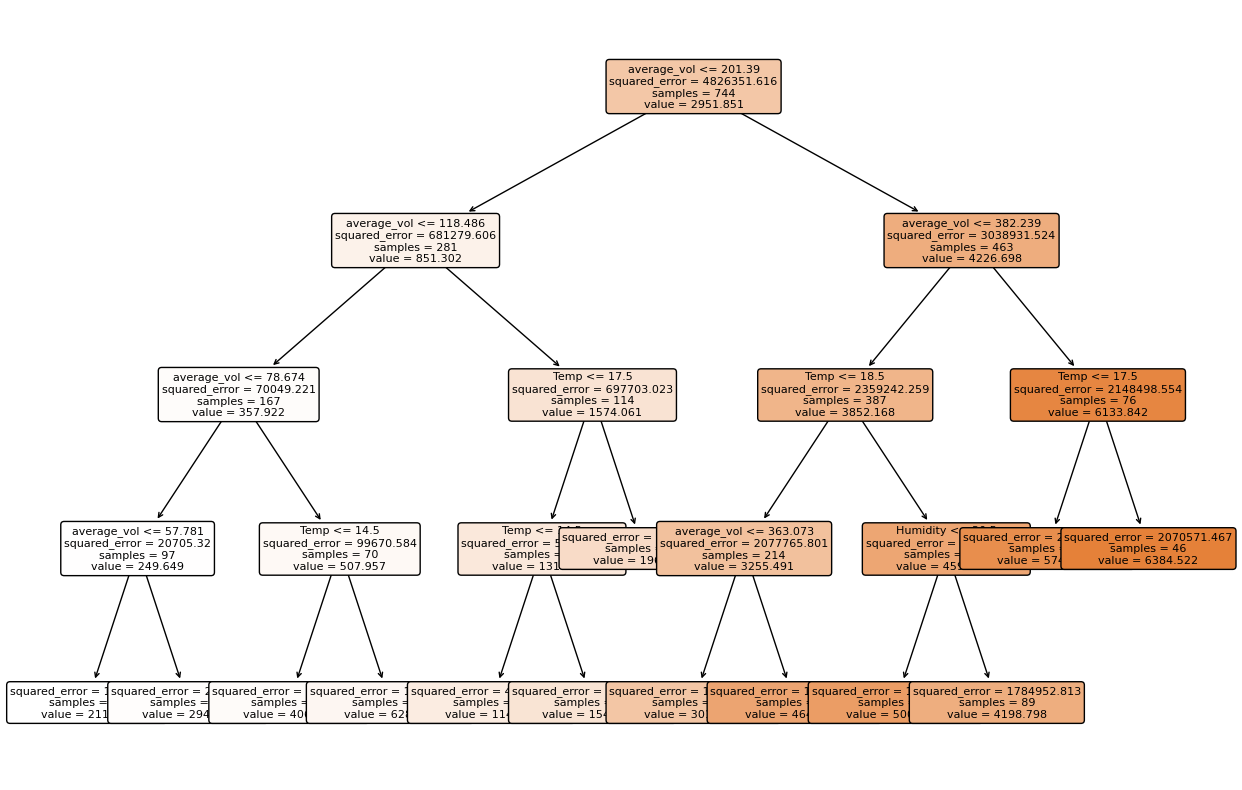

In [ ]:
# 借用次數對天氣、車流量的回歸樹
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
import matplotlib.pyplot as plt
dt_model = DecisionTreeRegressor(max_depth=4, min_samples_split=30, min_samples_leaf=30)
dt_model.fit(x, y)
feature_names = list(x.columns)
tree_rules = export_text(dt_model, feature_names=feature_names)
plt.figure(figsize=(15, 10))
plot_tree(dt_model, filled=True, feature_names=feature_names, rounded=True, fontsize=8)
plt.show()

In [ ]:
# 會員比對天氣、車流量的線性回歸分析
x = hourly_counts[['average_vol','Sunny', 'Cloudy', 'Rainy', 'Foggy', 'Temp', 'Wind', 'Humidity']]
y = hourly_counts['member_casual']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model.summary()
# 車流量、溫度、濕度顯著

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          member_casual   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     86.02
Date:                Sat, 16 Dec 2023   Prob (F-statistic):          3.33e-100
Time:                        14:43:28   Log-Likelihood:                -2253.5
No. Observations:                 744   AIC:                             4525.
Df Residuals:                     735   BIC:                             4566.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          85.1151      4.324     19.684      0.000      76.626      93.604
average_vol     0.0278      0.002     16.017      0.000       0.024       0.031
Sunny           0.8338      3.794      0.220      0.826      -6.615       8.283
Cloudy          0.3316      3.758      0.088      0.930      -7.046       7.710
Rainy          -0.2181      1.176     -0.185      0.853      -2.527       2.091
Foggy           1.8067      3.771      0.479      0.632      -5.596       9.210
Temp           -0.7897      0.055    -14.263      0.000      -0.898      -0.681
Wind           -0.0009      0.040     -0.022      0.983      -0.080       0.078
Humidity        0.0546      0.016      3.379      0.001       0.023       0.086
==============================================================================
Omnibus:                        0.078   Durbin-Watson:                   0.346
Prob(Omnibus):                  0.962   Jarque-Bera (JB):                0.138
Skew:                           0.017   Prob(JB):                        0.933
Kurtosis:                       2.943   Cond. No.                     1.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# 車輛類型比對天氣、車流量的線性回歸分析
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# 使用 Lasso 回歸進行特徵篩選
x = hourly_counts[['average_vol', 'Sunny', 'Cloudy', 'Rainy', 'Foggy', 'Temp', 'Wind', 'Humidity']]
y = hourly_counts['rideable_type_classic_bike']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train_scaled, y_train)
selected_features = x.columns[lasso_model.coef_ != 0]
print("Selected Features:", selected_features)
# 使用選中的特徵進行線性回歸
x_selected = x[selected_features]
x_selected = sm.add_constant(x_selected)
model_with_lasso = sm.OLS(y, x_selected).fit()
model_with_lasso.summary()
# 車流量、晴天、起霧、溫度、風力、濕度顯著，但模型解釋力差故不採納

Selected Features: Index(['average_vol', 'Sunny', 'Rainy', 'Foggy', 'Temp', 'Wind', 'Humidity'], dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     rideable_type_classic_bike   R-squared:                       0.189
Model:                                    OLS   Adj. R-squared:                  0.182
Method:                         Least Squares   F-statistic:                     24.56
Date:                        Sat, 16 Dec 2023   Prob (F-statistic):           3.54e-30
Time:                                14:46:40   Log-Likelihood:                -1709.4
No. Observations:                         744   AIC:                             3435.
Df Residuals:                             736   BIC:                             3472.
Df Model:                                   7                                         
Covariance Type:                    nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.3918      0.889     -1.565      0.118      -3.138       0.354
average_vol     0.0069      0.001      8.316      0.000       0.005       0.009
Sunny           1.9322      0.302      6.395      0.000       1.339       2.525
Rainy          -0.9827      0.550     -1.786      0.074      -2.063       0.097
Foggy          -1.2435      0.598     -2.078      0.038      -2.418      -0.069
Temp            0.1585      0.026      5.989      0.000       0.107       0.210
Wind            0.0548      0.019      2.835      0.005       0.017       0.093
Humidity        0.0491      0.008      6.357      0.000       0.034       0.064
==============================================================================
Omnibus:                      332.726   Durbin-Watson:                   0.480
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2069.350
Skew:                           1.925   Prob(JB):                         0.00
Kurtosis:                      10.207   Cond. No.                     2.68e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# 凌晨對天氣、車流量的線性回歸分析
midnight = hourly_counts[(hourly_counts['hour'] >= 0) & (hourly_counts['hour'] <= 5)]
x = midnight[['average_vol', 'Sunny', 'Cloudy', 'Rainy', 'Foggy', 'Wind', 'Humidity']]
y = midnight['count']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model.summary()
# 溫度顯著，扣除溫度後車流量顯著

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     17.99
Date:                Sun, 24 Dec 2023   Prob (F-statistic):           2.78e-16
Time:                        12:04:26   Log-Likelihood:                -1272.3
No. Observations:                 186   AIC:                             2559.
Df Residuals:                     179   BIC:                             2581.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         160.1846     78.643      2.037      0.043       4.998     315.371
average_vol     3.8031      0.389      9.784      0.000       3.036       4.570
Sunny          48.0636     30.226      1.590      0.114     -11.582     107.709
Cloudy        -32.4927     52.296     -0.621      0.535    -135.689      70.703
Rainy         140.0028    172.466      0.812      0.418    -200.325     480.330
Foggy         144.6137     78.591      1.840      0.067     -10.471     299.698
Wind           -4.5539      4.448     -1.024      0.307     -13.332       4.224
Humidity       -2.0565      1.143     -1.799      0.074      -4.312       0.199
==============================================================================
Omnibus:                       47.438   Durbin-Watson:                   0.758
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.314
Skew:                           1.295   Prob(JB):                     1.34e-18
Kurtosis:                       4.979   Cond. No.                     5.20e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.73e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
# 早上對天氣、車流量的線性回歸分析
morning = hourly_counts[(hourly_counts['hour'] >= 6) & (hourly_counts['hour'] <= 11)]
x = morning[['average_vol', 'Sunny', 'Cloudy', 'Rainy', 'Foggy', 'Wind', 'Humidity']]
y = morning['count']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model.summary()
# 溫度顯著，扣除溫度後車流量、晴天顯著

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     25.80
Date:                Sun, 24 Dec 2023   Prob (F-statistic):           5.46e-22
Time:                        12:16:48   Log-Likelihood:                -1552.3
No. Observations:                 186   AIC:                             3119.
Df Residuals:                     179   BIC:                             3141.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         171.8101    373.776      0.460      0.646    -565.764     909.384
average_vol    10.2583      0.933     10.991      0.000       8.417      12.100
Sunny         569.8708    171.953      3.314      0.001     230.555     909.187
Cloudy       -336.0192    259.257     -1.296      0.197    -847.612     175.574
Rainy        -496.0960    475.947     -1.042      0.299   -1435.284     443.092
Foggy         -62.0415    387.406     -0.160      0.873    -826.511     702.428
Wind            3.9570     14.694      0.269      0.788     -25.038      32.952
Humidity       -4.6340      5.669     -0.817      0.415     -15.821       6.553
==============================================================================
Omnibus:                        5.582   Durbin-Watson:                   1.260
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                4.032
Skew:                           0.226   Prob(JB):                        0.133
Kurtosis:                       2.438   Cond. No.                     1.07e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.34e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
# 下午對天氣、車流量的線性回歸分析
afternoon = hourly_counts[(hourly_counts['hour'] >= 12) & (hourly_counts['hour'] <= 17)]
x = afternoon[['average_vol','Sunny', 'Cloudy', 'Rainy', 'Foggy', 'Temp', 'Wind', 'Humidity']]
y = afternoon['count']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model.summary()
# 車流量、晴天、陰天、雨天、溫度顯著

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     11.73
Date:                Sat, 16 Dec 2023   Prob (F-statistic):           3.04e-12
Time:                        14:57:15   Log-Likelihood:                -1592.6
No. Observations:                 186   AIC:                             3201.
Df Residuals:                     178   BIC:                             3227.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1425.6620    944.992      1.509      0.133    -439.167    3290.491
average_vol     4.5085      1.676      2.690      0.008       1.200       7.816
Sunny        1172.6164    435.032      2.695      0.008     314.133    2031.100
Cloudy        966.5529    371.176      2.604      0.010     234.082    1699.024
Rainy       -1661.0494    754.031     -2.203      0.029   -3149.039    -173.060
Foggy        -713.5073    800.968     -0.891      0.374   -2294.122     867.108
Temp           69.1833     31.920      2.167      0.032       6.194     132.173
Wind          -18.8152     20.106     -0.936      0.351     -58.492      20.862
Humidity       -2.8328     10.362     -0.273      0.785     -23.281      17.616
==============================================================================
Omnibus:                       19.893   Durbin-Watson:                   1.529
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.621
Skew:                           0.871   Prob(JB):                     7.43e-06
Kurtosis:                       3.103   Cond. No.                     1.22e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.36e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
# 晚上對天氣、車流量的線性回歸分析
night = hourly_counts[(hourly_counts['hour'] >= 18) & (hourly_counts['hour'] <= 23)]
x = night[['average_vol','Sunny', 'Cloudy', 'Rainy', 'Foggy', 'Temp', 'Wind', 'Humidity']]
y = night['count']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model.summary()
# 車流量、雨天、溫度顯著

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     37.51
Date:                Sat, 16 Dec 2023   Prob (F-statistic):           2.43e-34
Time:                        14:58:53   Log-Likelihood:                -1580.5
No. Observations:                 186   AIC:                             3179.
Df Residuals:                     177   BIC:                             3208.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2841.1970   1516.725     -1.873      0.063   -5834.388     151.994
average_vol    16.5017      1.105     14.936      0.000      14.321      18.682
Sunny        -781.4299   1041.564     -0.750      0.454   -2836.912    1274.052
Cloudy        -22.7731   1001.862     -0.023      0.982   -1999.905    1954.359
Rainy       -1760.3120    530.539     -3.318      0.001   -2807.308    -713.316
Foggy       -1066.8857   1066.292     -1.001      0.318   -3171.167    1037.396
Temp          152.8791     28.503      5.364      0.000      96.630     209.128
Wind           20.1575     22.983      0.877      0.382     -25.199      65.513
Humidity       -3.2023      8.884     -0.360      0.719     -20.734      14.330
==============================================================================
Omnibus:                        6.659   Durbin-Watson:                   1.080
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                6.420
Skew:                           0.446   Prob(JB):                       0.0404
Kurtosis:                       3.183   Cond. No.                     6.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""